### Homework_2

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Փորձենք ստանալ հենց այն աղյուսակը, որը կա նկարում՝ համապատասխան տվյալները ներմուծելով․

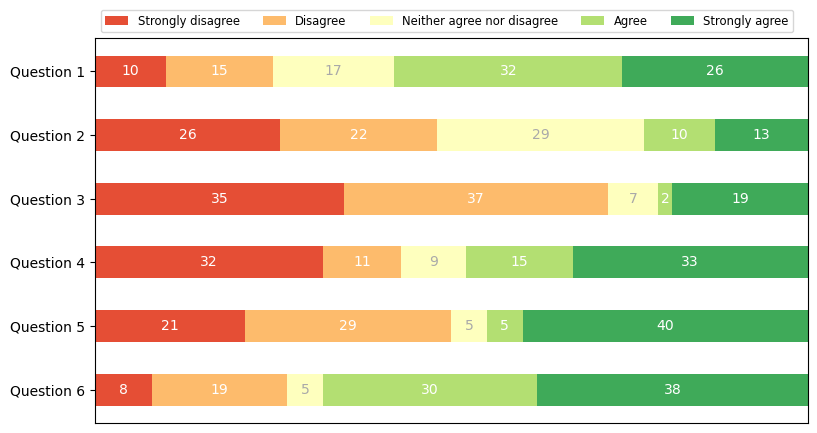

In [10]:
categories = ['Strongly disagree', 'Disagree','Neither agree nor disagree', 'Agree', 'Strongly agree']  # Վերևի կատեգորիաներն են
y = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],         #Ներմուծենք y-ի առանցքը՝ կազմված question-ներից։ Մատրիցային տեսքով էլ կարող էինք գրել
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}

def survey(y, categories):     #սահմանում ենք ֆունկցիա, որը երկու պարամետր ունի՝ y-ը և կատեգորիանները։

    labels = list(y.keys()) # y-ը սարքում ենք լիստ ու label-ին վերագրում
    data = np.array(list(y.values()))
    data_cum = data.cumsum(axis=1)  # տվյալների զանգվածի յուրաքանչյուր տողում տարրերի կուտակային գումարն ենք հաշվում
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))  # Այս տողը ստեղծում է նոր պատկեր/առանցք՝ օգտագործելով Matplotlib-ի ֆունկցիաններից։
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(categories, category_colors)):
        widths = data[:, i]   
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color  # alpha կոմպոնենտը մերժված է։ Ալֆա բաղադրիչը ներկայացնում է գույնի թափանցիկությունը,
                            # որտեղ 0-ը լիովին թափանցիկ է, իսկ 1-ը լիովին անթափանց:
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(categories), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

# Այս loop-ը կրկնվում է յուրաքանչյուր կատեգորիայի համար, արդյունահանում համապատասխան տվյալները
# և այնուհետև ստեղծում է հորիզոնական գծապատկերներ հետազոտության տվյալների մեջ:

survey(y, categories)
plt.show()

### Հիմա էլ ֆայլից փորձենք տվյալները ներմուծենք ու նույն գործողությունները անել

### Import our datas

In [11]:
df = pd.read_csv('C:\\Users\\Anna\\OneDrive\\Рабочий стол\\weather-check.csv')
df

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic
...,...,...,...,...,...,...,...,...,...
923,3877568054,Yes,The Weather Channel,-,Very likely,45 - 59,Female,Prefer not to answer,Pacific
924,3877568053,Yes,The default weather app on your phone,-,Very likely,30 - 44,Female,Prefer not to answer,South Atlantic
925,3877566926,Yes,Local TV News,-,Somewhat likely,60+,Female,Prefer not to answer,Pacific
926,3877551536,No,-,-,-,-,-,-,-


In [39]:
df.rename(columns={'If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?': 'like'}, inplace=True)
df                      #էն երկար նախադասությունը ուղղակի կարճացրի

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),like,Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic
...,...,...,...,...,...,...,...,...,...
923,3877568054,Yes,The Weather Channel,-,Very likely,45 - 59,Female,Prefer not to answer,Pacific
924,3877568053,Yes,The default weather app on your phone,-,Very likely,30 - 44,Female,Prefer not to answer,South Atlantic
925,3877566926,Yes,Local TV News,-,Somewhat likely,60+,Female,Prefer not to answer,Pacific
926,3877551536,No,-,-,-,-,-,-,-


In [13]:
unique_values = df['like'].unique()
unique_values    # Այստեղ ուղղակի հասկացա, թե քանի կատեգորիա կա

array(['Very likely', 'Somewhat likely', 'Very unlikely', '-',
       'Somewhat unlikely'], dtype=object)

In [14]:
unique_values = df['Age'].unique()
unique_values  

array(['30 - 44', '18 - 29', '-', '45 - 59', '60+'], dtype=object)

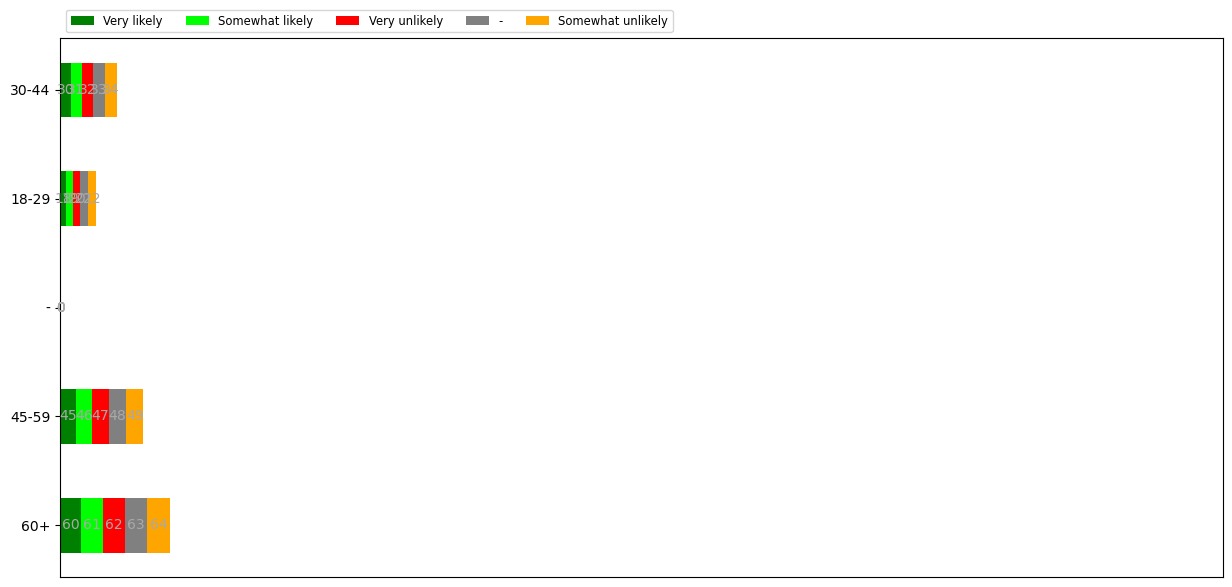

In [47]:
categories = ['Very likely', 'Somewhat likely', 'Very unlikely', '-', 'Somewhat unlikely']

y = {
    '30-44': list(range(30, 45)),
    '18-29': list(range(18, 30)),
    '-':     [],
    '45-59': list(range(45, 60)),
    '60+':   list(range(60, 101))
}

# Ensure all lists have the same length by filling missing data with zeros
max_length = max(len(lst) for lst in y.values())
for key in y:
    y[key] += [0] * (max_length - len(y[key]))

# Define a color mapping for each category
color_mapping = {
    'Very likely': 'green',
    'Somewhat likely': 'lime',
    'Very unlikely': 'red',
    '-': 'gray',
    'Somewhat unlikely': 'orange'
}

def survey(y, categories, color_mapping):
    labels = list(y.keys())
    data = np.array(list(y.values()))
    data_cum = data.cumsum(axis=1)

    fig, ax = plt.subplots(figsize=(15, 7))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(categories, [color_mapping[cat] for cat in categories])):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        text_color = 'white' if sum(color_mapping[cat] in ['black', 'darkblue', 'darkgreen', 'darkred', 'purple', 'maroon', 'brown', 'navy', 'darkgray'] for cat in categories) > 0 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)

    ax.legend(ncols=len(categories), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

survey(y, categories, color_mapping)
plt.show()


In [38]:
import numpy as np
import matplotlib.pyplot as plt

categories = ['Very likely', 'Somewhat likely', 'Very unlikely', '-', 'Somewhat unlikely']

y = {
    '30-44': list(range(30, 45)),
    '18-29': list(range(18, 30)),
    '-':     [],
    '45-59': list(range(45, 60)),
    '60+':   list(range(60, 101))
}

# Ensure all lists have the same length by filling missing data with zeros
max_length = max(len(lst) for lst in y.values())
for key in y:
    y[key] += [0] * (max_length - len(y[key]))

# Calculate percentages for each row
total_values = np.sum(list(y.values()), axis=1)
data_percent = (np.array(list(y.values())).T / total_values * 100).T

# Define a color mapping for each category
color_mapping = {
    'Very likely': 'green',
    'Somewhat likely': 'lime',
    'Very unlikely': 'red',
    '-': 'gray',
    'Somewhat unlikely': 'orange'
}

def survey(y, categories, color_mapping):
    labels = list(y.keys())
    data = np.array(list(y.values()))
    data_cum = data.cumsum(axis=1)

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, 100)  # Adjust the x-axis limit to 100%

    for i, (colname, color) in enumerate(zip(categories, [color_mapping[cat] for cat in categories])):
        widths = data_percent[:, i]  # Use the calculated percentages
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        text_color = 'white' if sum(color_mapping[cat] in ['black', 'darkblue', 'darkgreen', 'darkred', 'purple', 'maroon', 'brown', 'navy', 'darkgray'] for cat in categories) > 0 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)

    ax.legend(ncols=len(categories), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

survey(y, categories, color_mapping)
plt.show()


C:\Users\Anna\AppData\Local\Temp\ipykernel_27352\3906809130.py:21: RuntimeWarning: invalid value encountered in divide
  data_percent = (np.array(list(y.values())).T / total_values * 100).T


RuntimeError: Unknown return type

<Figure size 920x500 with 1 Axes>

In [50]:
import numpy as np
import matplotlib.pyplot as plt

categories = ['Very likely', 'Somewhat likely', 'Very unlikely', '-', 'Somewhat unlikely']

y = {
    '30-44': list(range(30, 45)),
    '18-29': list(range(18, 30)),
    '-':     [],
    '45-59': list(range(45, 60)),
    '60+':   list(range(60, 101))
}

max_length = max(len(lst) for lst in y.values())
for key in y:
    y[key] += [0] * (max_length - len(y[key]))

total_values = np.sum(list(y.values()), axis=1)
data_percent = (np.array(list(y.values())).T / total_values * 100).T


color_mapping = {
    'Very likely': 'red',
    'Somewhat likely': 'orange',
    'Very unlikely': 'lime',
    '-': 'green',
    'Somewhat unlikely': 'darkgreen'
}

def survey(y, categories, color_mapping):
    labels = list(y.keys())
    data = np.array(list(y.values()))
    data_cum = data.cumsum(axis=1)

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, 100)  # Adjust the x-axis limit to 100%

    for i, (colname, color) in enumerate(zip(categories, [color_mapping[cat] for cat in categories])):
        widths = data_percent[:, i]  # Use the calculated percentages
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        text_color = 'white' if sum(color_mapping[cat] in ['black', 'darkblue', 'darkgreen', 'darkred', 'purple', 'maroon', 'brown', 'navy', 'darkgray'] for cat in categories) > 0 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)

    ax.legend(ncols=len(categories), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

survey(y, categories, color_mapping)
plt.show()


C:\Users\Anna\AppData\Local\Temp\ipykernel_27352\3732258071.py:19: RuntimeWarning: invalid value encountered in divide
  data_percent = (np.array(list(y.values())).T / total_values * 100).T


RuntimeError: Unknown return type

<Figure size 920x500 with 1 Axes>